---

# Decision and Regression Trees

---

## Introduction

**Decision Trees (DTs)** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation. 

The basic goal of a decision tree is to split a population of data into smaller segments. There are two stages to prediction. The first stage is training the model—this is where the tree is built, tested, and optimized by using an existing collection of data by minimizing the entropy of the data from the root node to the leaf node. In the second stage, using the trained model to predict unknow data. 

---

## Algorithm

1. Begin with the entire dataset as the root node.
2. Calculate the impurity measure (e.g., Gini impurity or entropy) for the current node.
3. For each feature, calculate the information gain by splitting the node based on the feature's values.
4. Select the feature with the highest information gain as the splitting feature.
5. Create a child node for each possible value of the selected feature.
6. Repeat steps 2-5 for each child node until stopping criteria are met (e.g., maximum tree depth, minimum samples in a node, or a minimum improvement in impurity).

### Derivation of the Algorithm:

1. Gini Impurity:

    Gini impurity is a measure of how mixed the classes are in a node. It is defined as:

$$
\text{Gini}(t) = 1 - \sum[p(c|t)^2]
$$

 where $t$ is the current node and $p(c|t)$ is the probability of class $c$ in node $t$. A lower Gini impurity implies better separation of classes.

2. Entropy:

    Entropy is another impurity measure based on information theory. It is defined as:

$$
\text{Entropy}(t) = -\sum[p(c|t) * \log_2(p(c|t))]
$$

 where $t$ is the current node and $p(c|t)$ is the probability of class $c$ in node $t$. Lower entropy implies better separation of classes.

3. Information Gain:

 Information gain measures the reduction in impurity achieved by splitting a node on a feature. It is defined as:

$$
\text{IG}(\text{feature}) = \text{Impurity}(\text{parent}) - \sum_{j=1}^{k} \frac{n_j}{n} \text{Impurity}(\text{child}_j)
$$

where $\text{IG}(\text{feature})$ is the information gain for the considered feature, $\text{Impurity}(\text{parent})$ is the impurity of the parent node, and $\text{Impurity}(\text{child}j)$ is the impurity of the $j$-th child node. The sum $\sum{j=1}^{k}$ goes over all $k$ child nodes created after splitting the parent node using the feature. $n_j$ is the number of samples in the $j$-th child node, and $n$ is the total number of samples in the parent node. The term $\frac{n_j}{n}$ represents the weight for each child node, calculated as the proportion of samples in the child node relative to the parent node.


For a regression tree, the impurity measure can be replaced by the mean squared error (MSE) or mean absolute error (MAE). The algorithm remains the same, except that the target variable is continuous, and the objective is to minimize the impurity measure (e.g., MSE) instead of maximizing information gain.

Mean Squared Error (MSE):

$$
\text{MSE}(t) = \frac{1}{N} * \sum(y_i - \hat{y}_t)^2
$$

 where $N$ is the number of samples in node $t$, $y_i$ is the target value of the i-th sample, and $\hat{y}_t$ is the mean target value in node $t$.

Mean Absolute Error (MAE):

$$
\text{MAE}(t) = \frac{1}{N} * \sum|y_i - \hat{y}_t|
$$
    
 where $N$ is the number of samples in node $t$, $y_i$ is the target value of the i-th sample, and $\hat{y}_t$ is the mean target value in node $t$.



---

## Illustration

<img src="https://lh4.googleusercontent.com/v9UQUwaQTAXVH90b-Ugyw2_61_uErfYvTBtG-RNRNB_eHUFq9AmAN_2IOdfOETnbXImnQVN-wPC7_YzDgf7urCeyhyx5UZmuSwV8BVsV8VnHxl1KtgpuxDifJ4pLE23ooYXLlnc" width="400">

Decision trees are constructed from only two elements — nodes and branches.

* Root node — node at the top of the tree. This node acts as the input node for feature vectors in the model. 
* Decision nodes — nodes where the variables are evaluated. These nodes have arrows pointing to them and away from them
* Leaf nodes — final nodes at which the prediction is made

---

## Advantages and Disadvantages

### Advantages

* Decision trees are easy to understand and interpret. 
* Decision trees require little data preparation.
* The cost of using the tree is logarithmic in the number of data points used to train the tree, which is far less than the cost of other algorithms.

### Disadvantages

* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. 
* Decision tree learners create biased trees if some classes dominate. So, Chosing balaced dataset is recommended.
---

## Implementation

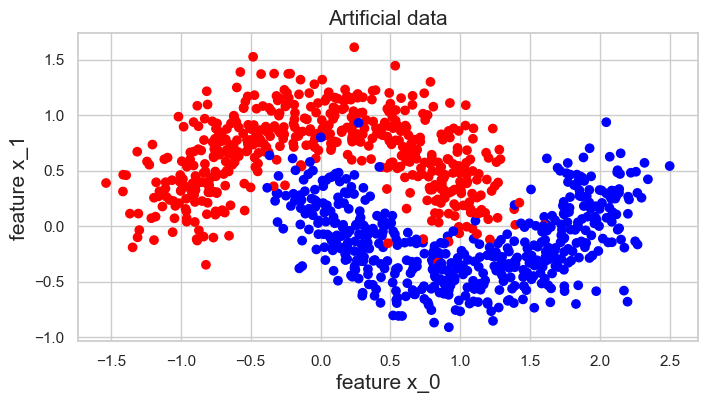

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
#set theme for seaborn
sns.set_theme(style="whitegrid")

# The artificial data will be taken from sklearn (make_moons)
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


X, y = make_moons(n_samples = 1_000, noise = 0.20, random_state=3)
colors = ["red" if label == 0 else "blue" for label in y]

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.title("Artificial data", fontsize = 15)
plt.grid(True)
plt.show()

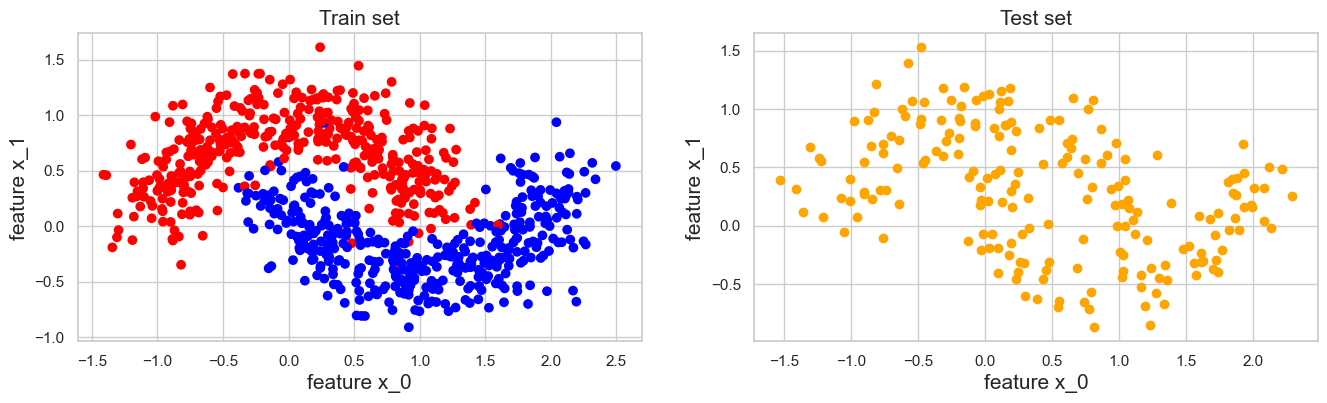

In [88]:


X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size = 0.2, random_state = 42)

c_train = ["red" if label == 0 else "blue" for label in y_train]
c_test = ["red" if label == 0 else "blue" for label in y_test]

fig,ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c = c_train)
ax[0].set_xlabel("feature x_0", fontsize = 15)
ax[0].set_ylabel("feature x_1", fontsize = 15)
ax[0].set_title("Train set", fontsize = 15)
ax[0].grid(True)

#plot test set with yellow color
ax[1].scatter(X_test[:, 0], X_test[:, 1], c = 'orange')
ax[1].set_xlabel("feature x_0", fontsize = 15)
ax[1].set_ylabel("feature x_1", fontsize = 15)
ax[1].set_title("Test set", fontsize = 15)
ax[1].grid(True)
plt.show()


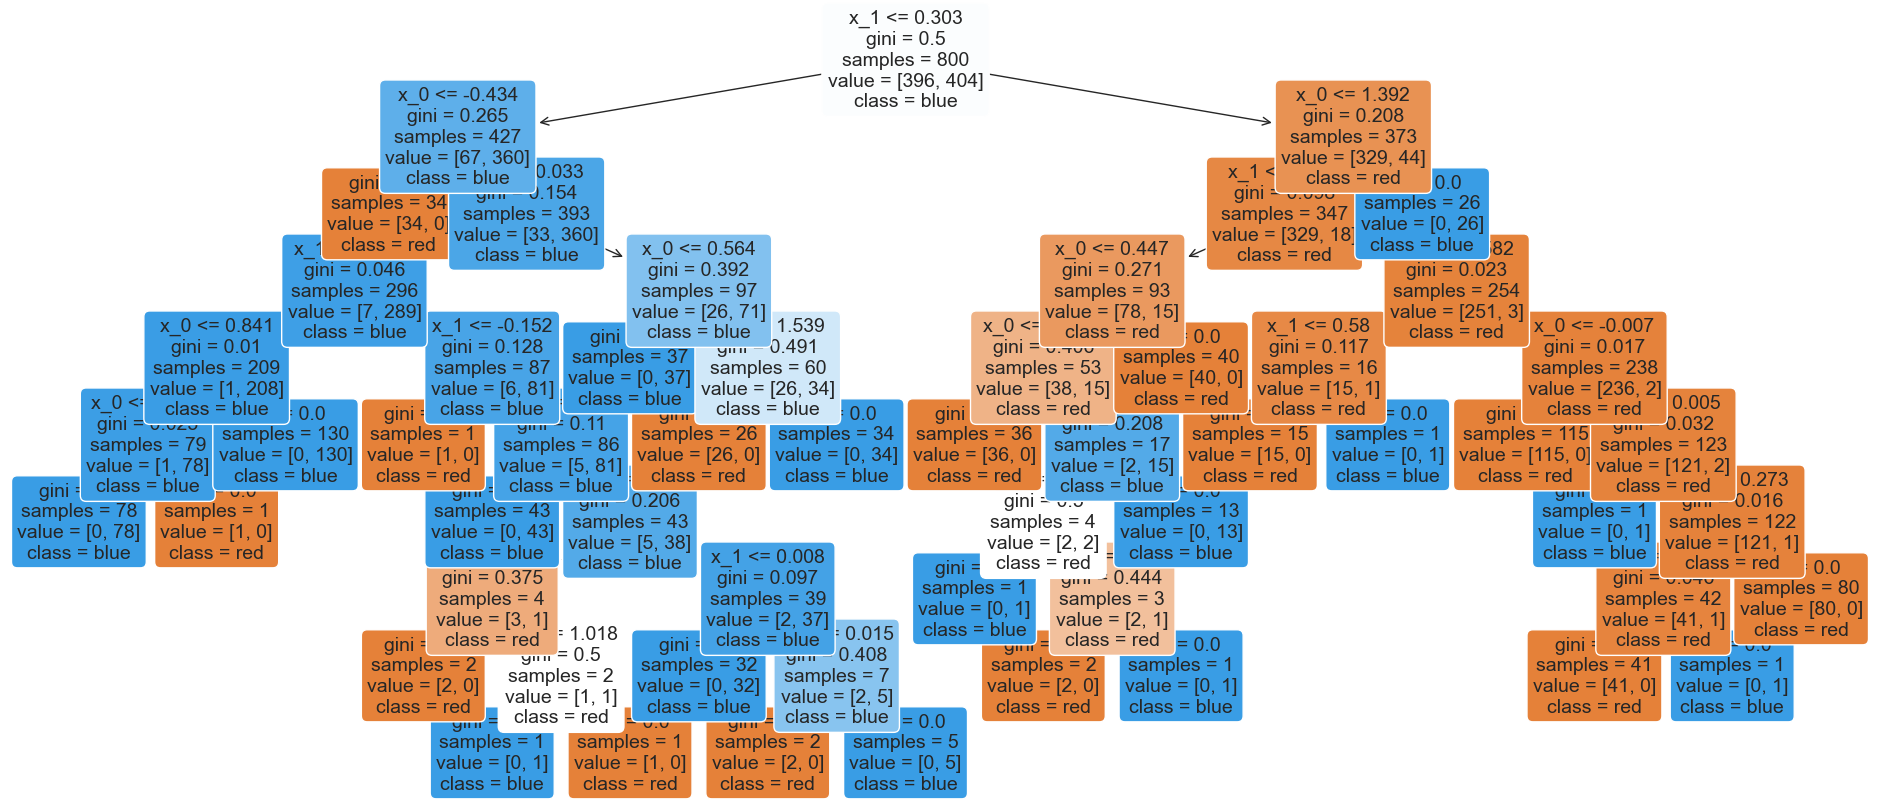

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text


decision_tree = DecisionTreeClassifier(max_depth=60, random_state=42)
decision_tree.fit(X_train, y_train)

plt.figure(figsize=(24, 10))
a = plot_tree(decision_tree,
                   feature_names = ["x_0", "x_1"],
                   class_names = ["red", "blue"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

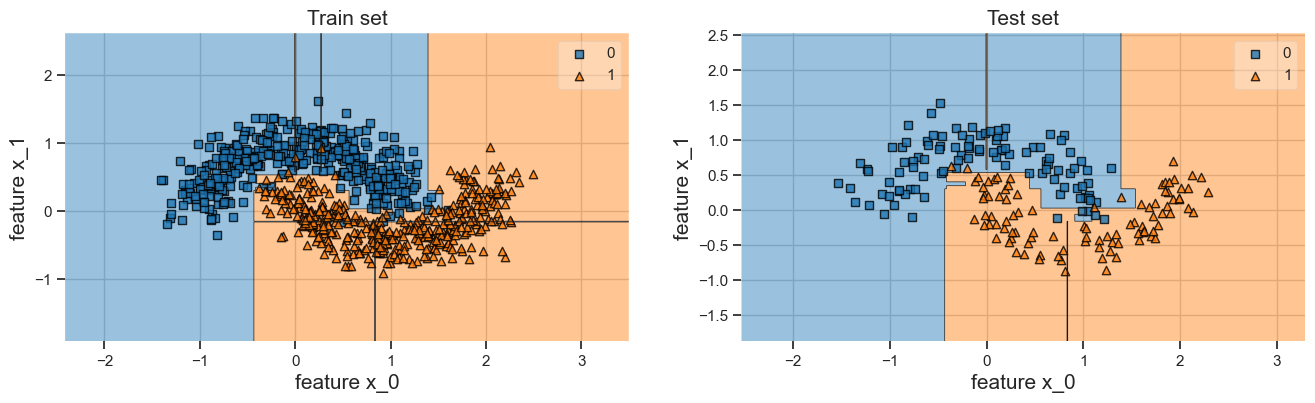

In [90]:
from mlxtend.plotting import plot_decision_regions

#plot two graphs in one row
fig,ax = plt.subplots(1, 2, figsize=(16, 4))

plot_decision_regions( X_train,y_train, clf = decision_tree, ax = ax[0])
ax[0].set_xlabel("feature x_0", fontsize = 15)
ax[0].set_ylabel("feature x_1", fontsize = 15)
ax[0].set_title("Train set", fontsize = 15)
ax[0].grid(True)

plot_decision_regions(X_test,y_test, clf = decision_tree, ax = ax[1])
ax[1].set_xlabel("feature x_0", fontsize = 15)
ax[1].set_ylabel("feature x_1", fontsize = 15)
ax[1].set_title("Test set", fontsize = 15)
ax[1].grid(True)
plt.show()

---

# Evaluation Metrics

We can use the following metrics to evaluate the performance of a decision tree model:

* Accuracy
* Precision
* Recall
* F1 Score
* ROC AUC Score

Here are some popular method for evaluating the performance of a classification model based on above metrics: the confusion matrix, ROC curve, and classification report components:

**1. Confusion Matrix**

A confusion matrix is a table that helps visualize the performance of a classification algorithm. In a binary classification problem, the confusion matrix consists of four values: True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).


**2. ROC Curve**

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the classifier's performance across different decision thresholds. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different thresholds.

- True Positive Rate (Sensitivity or Recall):

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- False Positive Rate (1 - Specificity):

$$
\text{FPR} = \frac{\text{FP}}{\text{TN} + \text{FP}}
$$

The Area Under the ROC Curve (AUC-ROC) is a single-value metric that measures the overall performance of the classifier. An AUC-ROC value of 1 indicates a perfect classifier, while a value of 0.5 represents a random classifier.

**3. Classification Report**

A classification report provides various performance metrics for a classifier. The key metrics are:

- Precision:

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

Precision measures the proportion of true positive predictions among all positive predictions. A high precision indicates that the classifier correctly identifies positive instances with few false positives.

- Recall (Sensitivity or True Positive Rate):

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

Recall measures the proportion of true positive predictions among all actual positive instances. A high recall indicates that the classifier identifies most of the positive instances with few false negatives.

- F1-score:

$$
\text{F1-score} = 2 * \frac{\text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}}
$$

The F1-score is the harmonic mean of precision and recall, and it provides a single metric that balances the trade-off between precision and recall. An F1-score close to 1 indicates a good classifier, while an F1-score close to 0 indicates a poor classifier.

In a multi-class classification problem, these metrics can be calculated for each class separately, and then averaged using either a macro-average (average of all classes) or a weighted-average (weighted by the number of samples in each class).




---

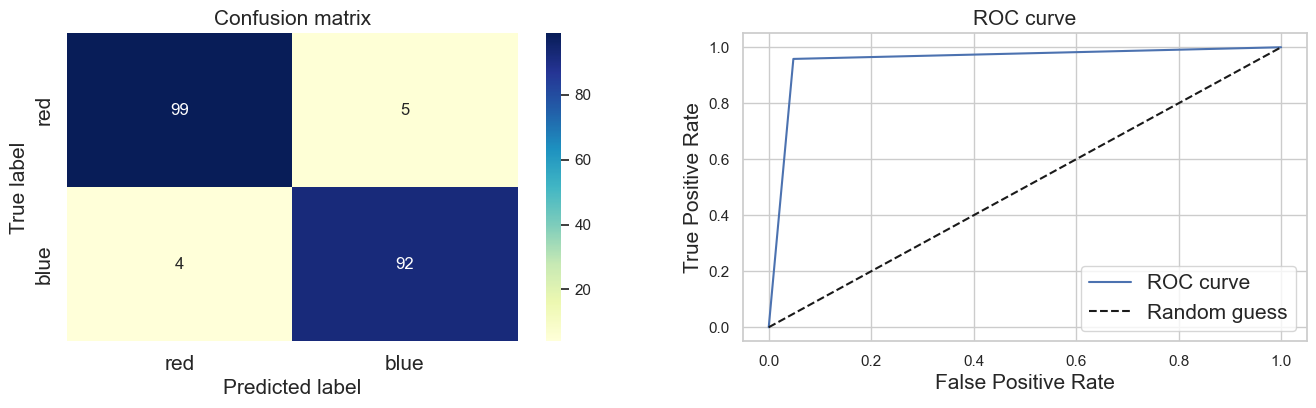

              precision    recall  f1-score   support

         red       0.96      0.95      0.96       104
        blue       0.95      0.96      0.95        96

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



In [91]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)


from sklearn import metrics

#plot two graphs in one row
fig,ax = plt.subplots(1, 2, figsize=(16, 4))


#plot confusion matrix
cm = metrics.confusion_matrix(y_test, test_pred_decision_tree)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", ax = ax[0])
ax[0].set_xlabel("Predicted label", fontsize = 15)
ax[0].set_ylabel("True label", fontsize = 15)
ax[0].set_title("Confusion matrix", fontsize = 15)
ax[0].set_xticklabels(["red", "blue"], fontsize = 15)
ax[0].set_yticklabels(["red", "blue"], fontsize = 15)


#plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_decision_tree)
ax[1].plot(fpr, tpr, label = "ROC curve")
ax[1].plot([0, 1], [0, 1], 'k--', label = "Random guess")
ax[1].set_xlabel("False Positive Rate", fontsize = 15)
ax[1].set_ylabel("True Positive Rate", fontsize = 15)
ax[1].set_title("ROC curve", fontsize = 15)
ax[1].legend(loc = "lower right", fontsize = 15)
plt.show()


#plot classification report
print(metrics.classification_report(y_test, test_pred_decision_tree, target_names = ["red", "blue"]))


---

# Regression Trees

Decision trees can also be used for regression problems. In this case, the target variable is continuous, and the objective is to predict the value of the target variable given a set of input variables. The algorithm remains the same, except that the target variable is continuous, and the objective is to minimize the impurity measure (e.g., MSE) instead of maximizing information gain.

In regression trees, the output variable is continuous and the aim is to partition the input space into a set of regions or partitions that have similar values of the output variable. The tree is constructed by recursively splitting the data into subsets based on the values of one of the input variables, until the subsets are homogeneous in terms of the output variable or a stopping criterion is reached. And homogeneous means that the values of the target variable within a subset or partition are similar or consistent with each other. This can be quantified using a measure of variability such as the sum of squared errors, where a lower value indicates higher homogeneity.


At each node of the tree, a splitting rule is applied to determine which variable to split on and at which value to split. The goal is to minimize the variability of the output variable within each subset or partition.


<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png" width="400">

By changing the depth of the tree, we can control the complexity of the model. A shallow tree will have a low variance and high bias, while a deep tree will have a high variance and low bias. The optimal depth of the tree can be determined using cross-validation.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

#convert to pandas dataframe
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df["target"] = california.target
california_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
#split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2, random_state = 42)

## Evaluation

After splitting a node, the algorithm will try to minimize the impurity measure (e.g., MSE) of the child nodes. The impurity measure can be replaced by the mean squared error (MSE) or mean absolute error (MAE).Therefor, we need to find the best depth of tree to get the best performance. Blow are two random depth of tree and use it to predict the test data.

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

reg1 = DecisionTreeRegressor(max_depth=1, random_state = 12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=40, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 0.944134970821567 

MSE reg2: 0.512222416350969 



To find the best depth for the decision tree, we can use the GridSearchCV function from sklearn. We will use the mean squared error as the scoring function.

Cross-validation, particularly k-fold cross-validation, helps address this issue by dividing the dataset into k equal-sized "folds." The model is then trained k times, with each fold serving as the validation set exactly once while the remaining k-1 folds are used for training. The average of the k validation scores provides a more reliable estimate of the model's performance on new data.

GridSearchCV, when combined with cross-validation, automates the process of testing different hyperparameter combinations and selecting the one that performs best on average across the k folds. In the case of decision tree depth, GridSearchCV will test each depth value you specify and, using cross-validation, compute the average MSE for each depth. The best depth is the one that produces the lowest average MSE across the folds.

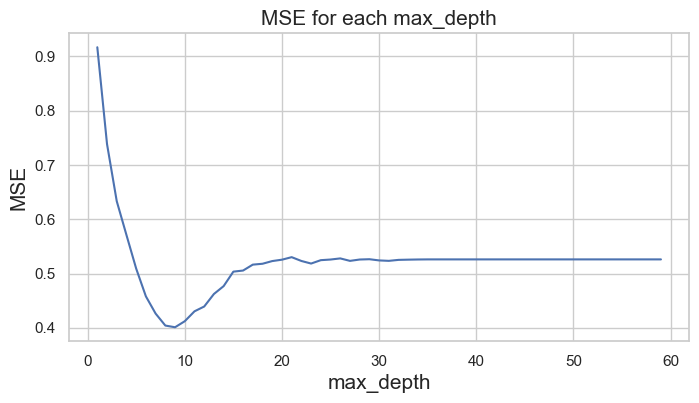

Best max_depth: 9
Best MSE: 0.4010554497254617


In [16]:
#find the best max_depth based on mean squared error
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": np.arange(1, 60)}
grid = GridSearchCV(DecisionTreeRegressor(random_state = 12), param_grid, cv = 5, scoring = "neg_mean_squared_error")
grid.fit(X_train, y_train)

#plot the mse for each max_depth
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, 60), -grid.cv_results_["mean_test_score"])
plt.xlabel("max_depth", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.title("MSE for each max_depth", fontsize = 15)
plt.show()

print(f"Best max_depth: {grid.best_params_['max_depth']}")
print(f"Best MSE: {-grid.best_score_}")


# Conclusion

Decision trees are a powerful and versatile Machine Learning algorithm that can be used for both classification and regression problems. They are simple to understand and interpret, and they require little data preparation. 